**IMPORTING YOUR DATASETS**

---
Download your datasets from here :
https://btsd.ethz.ch/shareddata/
Under the section for BelgiumTS for Classification (cropped images):	Both Training and Testing








In [1]:
# Install tf 2.0 preview GPU version
!pip install tensorflow==2.0.0-beta1 

     |████████████████████████████████| 87.9MB 1.2MB/s 
     |████████████████████████████████| 3.1MB 32.2MB/s 
     |████████████████████████████████| 501kB 46.9MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
# Common Imports
import os                                   # For os commands (dir cwd etc)
import zipfile                              # for extracting data set files
                                 
import skimage                              # for scikit-learn image operations
from matplotlib import pyplot as plt        # for visualizing data
import numpy as np                          # for numerical python
#import tensorflow as tf
from google.colab import files              # for importing files for 
import random                               # for random sampling in range(),number_of_values

import tensorflow as tf



In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


**CHANGE WORKING DIRECTORY TO UPLOADED FILES**

In [4]:

print(os.getcwd())
DATASET_PATH = """/gdrive/My Drive/Ml Datasets/Belgian Img Traffic Signs Datasets"""  # Insert Data Path here

os.chdir("../")
os.chdir(DATASET_PATH)
print(os.getcwd())

/gdrive
/gdrive/My Drive/Ml Datasets/Belgian Img Traffic Signs Datasets


**EXTRACT ZIP FILES IF NECESSARY**

In [0]:
#dataset_training = zipfile.ZipFile(io.BytesIO('BelgiumTSC_Training.zip') , 'r')


# Extracting Training Data
with zipfile.ZipFile('BelgiumTSC_Training.zip', 'r') as zipObj:
  zipObj.extractall('TrainingData')

  
# Extracting Testing Data
with zipfile.ZipFile('BelgiumTSC_Testing.zip', 'r') as zipObj:
  zipObj.extractall('TestingData')
print('SucessFully Extracted DataFiles!')

LOADING DATA INTO PYTHON 

In [0]:
def load_images(data_directory):
  
  # lists to store Images and labels
  images = []
  labels = []
  log_index = 0
  # get list of all directories present in the data_directory path
  directories = [dir for dir in os.listdir(data_directory)
                 if os.path.isdir(os.path.join(data_directory,dir))] # to make sure that we include only directories and not any files present in the folder
  print(len(directories))
  for dir in directories:
    current_directory = os.path.join(data_directory,dir)
    # Gather all fileNames in the given directory to load images into images array using sklearn
    file_names = [os.path.join(current_directory,file) 
                  for file in os.listdir(current_directory)
                  if file.endswith('.ppm')
                 ]
    
    # Load all given Images into the Images array
    for file in file_names:
      images.append(skimage.data.imread(file))
      labels.append(int(dir))
      log_index+=1
      # print('Loading File: {0}'.format(log_index))
  print('Successfully Loadded  {0} images!'.format(len(images)))
  return np.array(images),np.array(labels)





In [6]:
# LOAD IMAGES 
  
ROOT_PATH = os.getcwd()  
TRAININ_DATA_PATH = ROOT_PATH + '/TrainingData/Training'  
TEST_DATA_PATH = ROOT_PATH + '/TestingData/Testing'
  
training_images, training_labels = load_images(TRAININ_DATA_PATH)
print('Training Data Sucessfully Loaded!!')
testing_images,testing_labels = load_images(TEST_DATA_PATH)
print('Test data sucessfully loaded!!')


62
Successfully Loadded  4575 images!
Training Data Sucessfully Loaded!!
62
Successfully Loadded  2520 images!
Test data sucessfully loaded!!


**To Verify and get some facts about our Data**

In [7]:
index = 1                          # Replace the index to check out the shape of input images
print('Dimension of Image at index ' + str(index) + ':', training_images[index].shape)  
print('Number of training Images :' , training_images.size)
print('Number of Dimensions of Images array : ',training_images.ndim)                 # ndims - number of dimensions for np array images

print('Dimensions for labels :', training_labels.shape)
print('Label for Image at index ' + str(index) +': ',training_labels[index])
print('Number of Classes : ',len(set(training_labels)))

print('Some additional tidbits about the memory requirements of data ')
print('Size of an individual image: ' ,training_images.itemsize)

Dimension of Image at index 1: (97, 91, 3)
Number of training Images : 4575
Number of Dimensions of Images array :  1
Dimensions for labels : (4575,)
Label for Image at index 1:  1
Number of Classes :  62
Some additional tidbits about the memory requirements of data 
Size of an individual image:  8


### Lets split these into 2 sets Validation and testing  with approx 1500 images for validation and 2000 for testing 


In [0]:
def transform_images(images,height,width):
  transformed_images = [skimage.transform.resize(image,(height,width)) for image in images]
  return  np.array(transformed_images)


In [9]:
print('Number of Testing Images: ',testing_images.shape[0])
# Lets split these into 2 sets Validation and testing  with approx 1500 images for validation and 2000 for testing
index_list = np.arange(len(testing_images))
idx = np.random.choice(index_list, 1500, replace=False)
otheridx = [ indices for indices in index_list  if indices not in idx]

validation_images = testing_images[idx]
validation_labels = testing_labels[idx]

final_testing_images = testing_images[otheridx]
final_testing_labels = testing_labels[otheridx]



print(validation_images.shape)
print(final_testing_images.shape)

training_images128 = transform_images(training_images,128,128)
validation_images128 = transform_images(validation_images,128,128)
tresting_images128 = transform_images(final_testing_images,128,128)


Number of Testing Images:  2520
(1500,)
(1020,)



Now we have our basic image sets ready. All we need to do is Transform them to appropriate sizes before trying out the model.

Training Set --  training_images , training_labels  
Training set 128x128   -- training_images128

Testing Set  --  final_testing_images, final_testing_labels

Validation Set --  validation_images,validation_labels

In [0]:
def show_images_of_all_classes(train_images,training_labels):
  num_cols =  8
  classes = len(set(training_labels))
  if classes % num_cols == 0:
      num_rows =  classes / num_cols
  else:
      num_rows = int(classes / num_cols) + 1
  plt.figure(figsize=(15,15))
  i = 1
  for class_number in range(0,classes):
    
    indices = np.where(training_labels == class_number)
    plt.subplot(num_rows,num_cols, i)
    i += 1
    plt.axis('off')
    plt.imshow(train_images[indices[0][1]])
    plt.title('Class :{0} [{1}] '.format(class_number,len(indices[0])))   #np.count_nonzero(labels == labels[index])))
  plt.show()


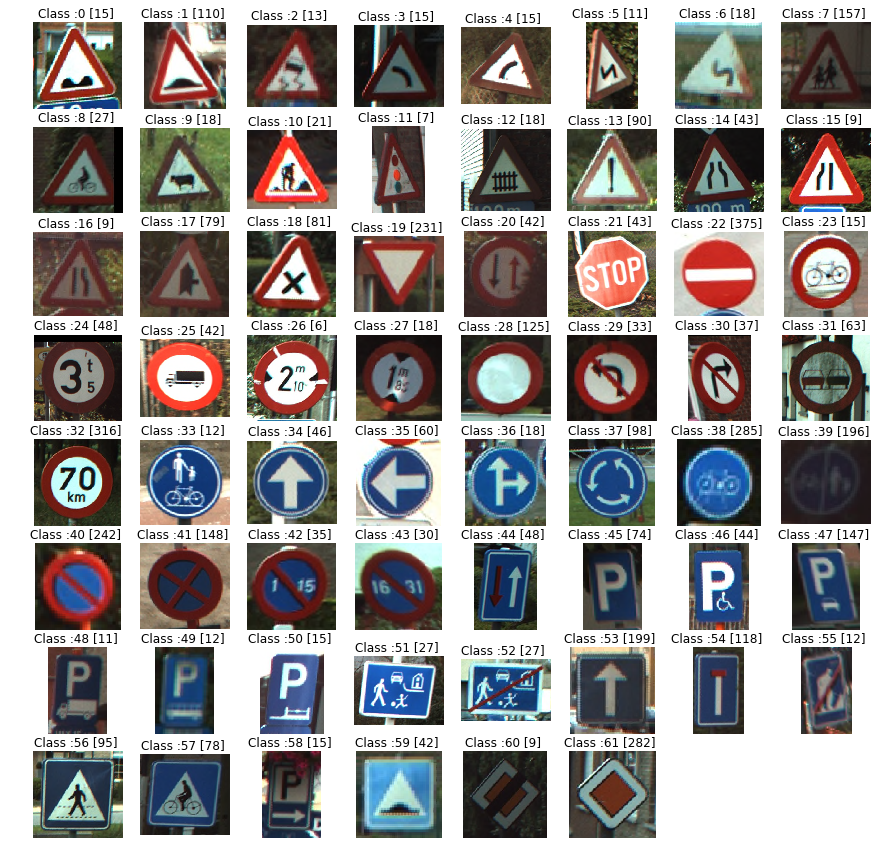

In [11]:
show_images_of_all_classes(training_images,training_labels)

In [0]:
# Create a dictionary with Class Names
classnames = {
              0 : 'Warning for a bad road surface',
              1 : 'Warning for a speed bump',
              2 : 'Warning for a slippery road surface',
              3 : 'Warning for a curve to the left',
              4 : 'Warning for a curve to the right',
              5 : 'Warning for a double curve, first left then right',                                                    # Merge Classes 5 & 6 later
              6 : 'Warning for a double curve, first left then right',
              7 : 'Watch out for children ahead',
              8 : 'Watch out for  cyclists',
              9 : 'Watch out for cattle on the road',
              10: 'Watch out for roadwork ahead',
              11: 'Traffic light ahead',
              12: 'Watch out for railroad crossing with barriers ahead',
              13: 'Watch out ahead for unknown danger',
              14: 'Warning for a road narrowing',
              15: 'Warning for a road narrowing on the left',
              16: 'Warning for a road narrowing on the right',
              17: 'Warning for side road on the right',
              18: 'Warning for an uncontrolled crossroad',
              19: 'Give way to all drivers',
              20: 'Road narrowing, give way to oncoming drivers',
              21: 'Stop and give way to all drivers',
              22: 'Entry prohibited (road with one-way traffic)',
              23: 'Cyclists prohibited',
              24: 'Vehicles heavier than indicated prohibited',
              25: 'Trucks prohibited',
              26: 'Vehicles wider than indicated prohibited',
              27: 'Vehicles higher than indicated prohibited',
              28: 'Entry prohibited',
              29: 'Turning left prohibited',
              30: 'Turning right prohibited',
              31: 'Overtaking prohibited',
              32: 'Driving faster than indicated prohibited (speed limit)',
              33: 'Mandatory shared path for pedestrians and cyclists',
              34: 'Driving straight ahead mandatory',
              35: 'Mandatory left',
              36: 'Driving straight ahead or turning right mandatory',
              37: 'Mandatory direction of the roundabout',
              38: 'Mandatory path for cyclists',
              39: 'Mandatory divided path for pedestrians and cyclists',
              40: 'Parking prohibited',
              41: 'Parking and stopping prohibited',
              42: '',
              43: '',
              44: 'Road narrowing, oncoming drivers have to give way',
              45: 'Parking is allowed',
              46: 'parking for handicapped',
              47: 'Parking for motor cars',
              48: 'Parking for goods vehicles',
              49: 'Parking for buses',
              50: 'Parking only allowed on the sidewalk',
              51: 'Begin of a residential area',
              52: 'End of the residential area',
              53: 'Road with one-way traffic',
              54: 'Dead end street',
              55: '', 
              56: 'Crossing for pedestrians',
              57: 'Crossing for cyclists',
              58: 'Parking exit',
              59: 'Information Sign : Speed bump',
              60: 'End of the priority road',
              61: 'Begin of a priority road'
    }

In [0]:
def show_images_of_class(class_number,training_labels,train_images):
  if class_number > 62 :
    print('Class number exceeds max classes (62)')
    return
  
  indices = np.where(training_labels == class_number)
  temp = train_images[indices]
  print(np.argmax(training_labels,axis=0))
  print(temp.shape)
  plt.imshow(temp[1])
  plt.show()
  plt.imshow(temp[5])
  plt.show()
  number_of_images_to_display = len(indices[0])
  print('Images for the given Class[{}] : {}'.format(class_number,number_of_images_to_display))

4278
(30,)


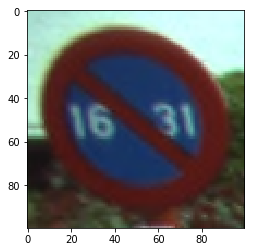

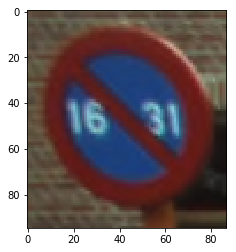

Images for the given Class[43] : 30


In [14]:
show_images_of_class(43,training_labels,training_images)

# OBSERVATIONS ABOUT DATASET


1.   Unequal Image DImensions - Our Algorithms        need input images to be of the same                    dimensions
2.   62 Classes for our data
3.   Unequal Distribution of data


# STEPS TO DO NOW!

*  Select 





## Let's set up Tensorboard to view our model progress

In [15]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-08-02 04:14:52--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.226.180.131, 52.45.111.123, 52.86.84.98, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.226.180.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13607069 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  12.98M  43.5MB/s    in 0.3s    

2019-08-02 04:14:52 (43.5 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13607069/13607069]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
# fire up tensorboard in the background
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

It is assuming the TensorBoard log path is "./log", where we are going to tell Keras to log files.

Then, we can run ngrok to tunnel TensorBoard port 6006 to the outside world. This command also runs in the background.

In [17]:
get_ipython().system_raw('./ngrok http 6006 &')
# One last step, we get the public URL where we can access the colab TensorBoard web page.
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.6/json/__init__.py", line 299, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.6/json/__init__.py", line 354, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.6/json/decoder.py", line 339, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.6/json/decoder.py", line 357, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


This will output a URL you can click on, but wait! We haven't trained our model, so you not get any information from TensorBoard yet.

We define a callback for TensorBoard that logs all available data to the tensorboard

In [18]:
from tensorflow.keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         write_images=True)

W0802 04:53:56.400318 139987909445504 callbacks.py:1467] `write_grads` will be ignored in TensorFlow 2.0 for the `TensorBoard` Callback.


### Image Augmentation

Keras provides a handy api to do various operations on our input images before passing them to the model.
These changes range from cropping the image to flipping it and even providing shearing effects......

So Let's look at how it looks in action:


READY OUR DATA GENERATORS FOR IMAGE AUGMENTATION

In [0]:
# Training Data Generator

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,fill_mode='nearest')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [0]:
# Ready our generators for passing into models 
train_generator = training_datagen.flow(training_images128,training_labels,batch_size=30)

validation_generator = validation_datagen.flow(validation_images128,validation_labels,batch_size=30)


Labels: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


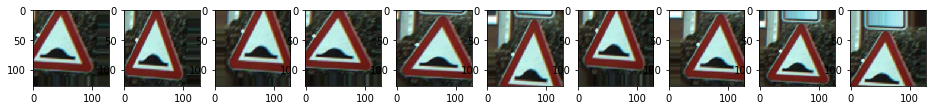

In [21]:
# try and visualize your images

nyan_generator = training_datagen.flow(training_images128[11:12], training_labels[110:111],batch_size=1)

sign = [next(nyan_generator) for i in range(0,10)]
fig, ax = plt.subplots(1,10, figsize=(16, 6))
print('Labels:', [item[1][0] for item in sign])
l = [ax[i].imshow(sign[i][0][0]) for i in range(0,10)]

In [0]:
# Define our model using InceptionV3
def model_transferred_inception(input_dims,output_classes,freeze_layers = True):
  # Get the inception v3 model so we can use it for transfer learning
  inception_base = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top = False, input_shape = input_dims)
  inception_base.trainable = False
  output = inception_base.output
  output = tf.keras.layers.GlobalAveragePooling2D()(output)
  output = tf.keras.layers.Dense(512,activation='relu')(output)
  output = tf.keras.layers.Dropout(0.2)(output)
  output = tf.keras.layers.Dense(512,activation='relu')(output)
  output = tf.keras.layers.Dropout(0.2)(output)
  predictions = tf.keras.layers.Dense(output_classes,activation='softmax')(output)
  
  model = tf.keras.models.Model(inputs=inception_base.input,outputs = predictions)
  index = 0
  # for freezing layers
  print ('Model Layer count: ',len(inception_base.layers))
  return model



In [45]:
# try clearing keras backend to prevent errors
import tensorflow.keras.backend as K
K.clear_session()

model_inception_transfer = model_transferred_inception(training_images128[0].shape,len(set(training_labels)))

model_inception_transfer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

model_inception_transfer.summary()

Model Layer count:  311
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
______________________________________________________________________

In [49]:

history_inception  = model_inception_transfer.fit_generator(train_generator, validation_data=validation_generator,epochs=10,verbose=1,callbacks=[tbCallBack])

Epoch 1/10
153/153 [==============================] - 606s 4s/step - loss: 0.9778 - acc: 0.7305 - val_loss: 3.8724 - val_acc: 0.4860
Epoch 2/10
153/153 [==============================] - 568s 4s/step - loss: 0.9830 - acc: 0.7261 - val_loss: 3.5719 - val_acc: 0.4800
Epoch 3/10
153/153 [==============================] - 559s 4s/step - loss: 0.9871 - acc: 0.7217 - val_loss: 3.6039 - val_acc: 0.4880
Epoch 4/10
153/153 [==============================] - 556s 4s/step - loss: 0.9411 - acc: 0.7421 - val_loss: 3.7340 - val_acc: 0.4887
Epoch 5/10
153/153 [==============================] - 566s 4s/step - loss: 0.9275 - acc: 0.7366 - val_loss: 3.5909 - val_acc: 0.5053
Epoch 6/10
153/153 [==============================] - 558s 4s/step - loss: 0.9499 - acc: 0.7307 - val_loss: 3.7041 - val_acc: 0.4960
Epoch 7/10
153/153 [==============================] - 558s 4s/step - loss: 0.9016 - acc: 0.7392 - val_loss: 3.3158 - val_acc: 0.5300
Epoch 8/10
153/153 [==============================] - 567s 4s/step - 

In [23]:
inception_base = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top = False, input_shape = training_images128[0].shape)
inception_base.trainable = False

  
model = tf.keras.Sequential([inception_base,
                            tf.keras.layers.GlobalAveragePooling2D(),
                            tf.keras.layers.Dense(512,activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(512,activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(len(set(training_labels)),activation='softmax')])

87916544/87910968 [==============================] - 1s 0us/step


In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 62)                3

In [25]:
history = model.fit_generator(train_generator, validation_data=validation_generator,epochs=10,verbose=1)

Epoch 1/10


W0802 04:54:21.633550 139987909445504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


153/153 [==============================] - 261s 2s/step - loss: 2.7871 - accuracy: 0.3622 - val_loss: 4.0760 - val_accuracy: 0.3513
Epoch 2/10
153/153 [==============================] - 232s 2s/step - loss: 1.8210 - accuracy: 0.5311 - val_loss: 4.0062 - val_accuracy: 0.3673
Epoch 3/10
153/153 [==============================] - 233s 2s/step - loss: 1.5179 - accuracy: 0.5871 - val_loss: 3.7720 - val_accuracy: 0.4607
Epoch 4/10
153/153 [==============================] - 236s 2s/step - loss: 1.3832 - accuracy: 0.6210 - val_loss: 3.2078 - val_accuracy: 0.4833
Epoch 5/10
153/153 [==============================] - 232s 2s/step - loss: 1.2892 - accuracy: 0.6383 - val_loss: 3.4474 - val_accuracy: 0.4840
Epoch 6/10
153/153 [==============================] - 234s 2s/step - loss: 1.2083 - accuracy: 0.6555 - val_loss: 4.2461 - val_accuracy: 0.4767
Epoch 7/10
153/153 [==============================] - 233s 2s/step - loss: 1.1937 - accuracy: 0.6568 - val_loss: 3.7588 - val_accuracy: 0.4493
Epoch 8/10

For Transfer Learning Unfreeze a few layers

In [0]:
# Save weights so that we can load them to our new model later
model.save_weights('inception_frozen_weights')




In [0]:
# Fine tune from this layer onwards
inception = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top = False, input_shape = training_images128[0].shape)
fine_tune_at = 208
for layer in inception.layers:
  layer.trainable =  True
# Freeze all the layers before the `fine_tune_at` layer
for layer in inception.layers[:fine_tune_at]:
  layer.trainable =  False

In [0]:
 
# Check the trainable status of the individual layers
for layer in inception.layers:
    print(layer, layer.trainable)

In [53]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(inception.layers))


Number of layers in the base model:  311


In [0]:
#Create new model with trainable paramters
model_fine_tune = tf.keras.Sequential()
model_fine_tune.add(inception)
model_fine_tune.add(tf.keras.layers.GlobalAveragePooling2D())
model_fine_tune.add(tf.keras.layers.Dense(512,activation='relu'))
model_fine_tune.add( tf.keras.layers.Dropout(0.2))
model_fine_tune.add(tf.keras.layers.Dense(512,activation='relu'))
model_fine_tune.add(tf.keras.layers.Dropout(0.2))
model_fine_tune.add(tf.keras.layers.Dense(len(set(training_labels)),activation='softmax'))



In [55]:
model_fine_tune.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_fine_tune.summary()
len(model_fine_tune.trainable_variables)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 62)               

66

In [56]:
model_fine_tune.load_weights('inception_frozen_weights')

In [57]:
history_fine_tune = model.fit_generator(train_generator, validation_data=validation_generator,epochs=10,verbose=1)

Epoch 1/10
153/153 [==============================] - 246s 2s/step - loss: 1.0994 - accuracy: 0.6833 - val_loss: 3.5094 - val_accuracy: 0.4753
Epoch 2/10
153/153 [==============================] - 233s 2s/step - loss: 1.0614 - accuracy: 0.7054 - val_loss: 4.7627 - val_accuracy: 0.4247
Epoch 3/10
153/153 [==============================] - 231s 2s/step - loss: 1.0186 - accuracy: 0.7064 - val_loss: 3.7041 - val_accuracy: 0.4767
Epoch 4/10
153/153 [==============================] - 232s 2s/step - loss: 1.0513 - accuracy: 0.7005 - val_loss: 3.5289 - val_accuracy: 0.4927
Epoch 5/10
153/153 [==============================] - 232s 2s/step - loss: 1.0314 - accuracy: 0.7058 - val_loss: 4.0577 - val_accuracy: 0.4913
Epoch 6/10
153/153 [==============================] - 231s 2s/step - loss: 0.9692 - accuracy: 0.7158 - val_loss: 2.8129 - val_accuracy: 0.5360
Epoch 7/10
153/153 [==============================] - 232s 2s/step - loss: 0.9861 - accuracy: 0.7202 - val_loss: 4.0754 - val_accuracy: 0.4653

In [0]:
model_fine_tune.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [64]:
history_fine_tune = model.fit_generator(train_generator,steps_per_epoch = 300, validation_data=validation_generator,epochs=20,verbose=1)

Epoch 1/20
300/300 [==============================] - 409s 1s/step - loss: 0.8291 - accuracy: 0.7612 - val_loss: 4.4969 - val_accuracy: 0.4747
Epoch 2/20
300/300 [==============================] - 409s 1s/step - loss: 0.8170 - accuracy: 0.7693 - val_loss: 4.2583 - val_accuracy: 0.4547
Epoch 3/20
300/300 [==============================] - 408s 1s/step - loss: 0.8345 - accuracy: 0.7585 - val_loss: 3.5769 - val_accuracy: 0.4960
Epoch 4/20
300/300 [==============================] - 407s 1s/step - loss: 0.8242 - accuracy: 0.7608 - val_loss: 4.5275 - val_accuracy: 0.4587
Epoch 5/20
300/300 [==============================] - 410s 1s/step - loss: 0.7964 - accuracy: 0.7718 - val_loss: 4.4943 - val_accuracy: 0.4993
Epoch 6/20
300/300 [==============================] - 411s 1s/step - loss: 0.8166 - accuracy: 0.7595 - val_loss: 4.3076 - val_accuracy: 0.4960
Epoch 7/20
300/300 [==============================] - 410s 1s/step - loss: 0.8323 - accuracy: 0.7604 - val_loss: 4.4305 - val_accuracy: 0.4773

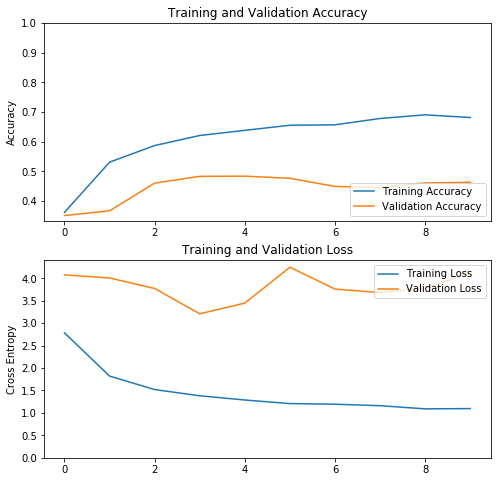

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Note: this should only be attempted after you have trained the top-level classifier with the pre-trained model set to non-trainable. If you add a randomly initialized classifier on top of a pre-trained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier) and your pre-trained model will just forget everything it has learned.

In [0]:
# TIME TO RELEASE THE KRAKEN!!!!!!
# Ahahaha just trying to unfreeze a top few layers of the model now

